In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Loading the data files
df_matches = pd.read_csv("/content/drive/MyDrive/IPL_Data_/ipl_matches_v1.csv")
df_deliveries = pd.read_csv("/content/drive/MyDrive/IPL_Data_/deliveries.csv")

In [ ]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
#Dropping 'umpire3' column as it has all Null values
df_matches.drop(['umpire3'],axis=1,inplace=True)

In [ ]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
#Viewing basic statistics of the dataset
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [ ]:
#Total Matches played 
len(df_matches.index)

636

In [ ]:
# Player of the match frequency
potm = df_matches['player_of_match'].value_counts()
potm.head()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: player_of_match, dtype: int64

In [ ]:
#Printing columns
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
#Match Results
result = df_matches['result'].value_counts()
result

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [ ]:
#Number of matches in which 'DL' applied
dl = df_matches['dl_applied'].value_counts()
dl

0    620
1     16
Name: dl_applied, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


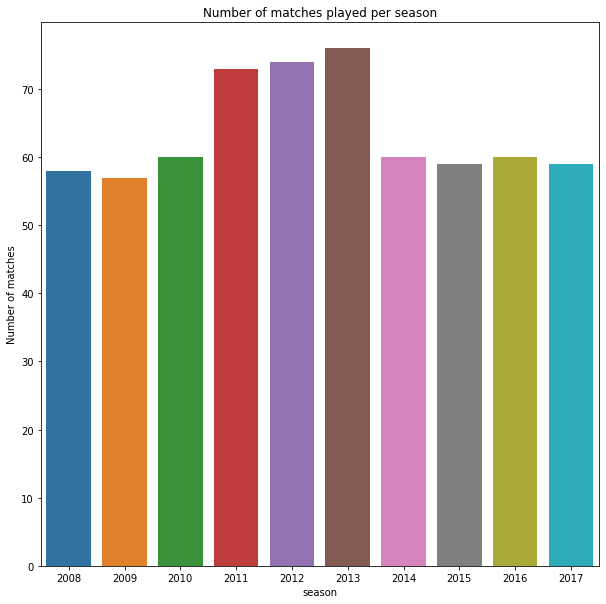

In [ ]:
#Number of matches played in each season
plt.figure(figsize=(10,10))
sns.countplot(df_matches['season'])
plt.xlabel('season')
plt.ylabel('Number of matches')
plt.title('Number of matches played per season')
plt.show()

In [ ]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df_deliveries.shape

(150460, 21)

In [ ]:
#Merging dataframes 'df_matches & df_deliveries' based on 'id' column in 'df_matches' and 'match_id' column in 'df_deliveries'
df_merged = df_matches[['id','season']].merge(df_deliveries, left_on = 'id', right_on = 'match_id', how = 'right')

df_merged.drop('id',axis=1,inplace=True)

df_merged.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
#Total runs scored in a season
season_runs = df_merged.groupby(['season'])['total_runs'].sum().reset_index()
season_runs

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


Text(0.5, 1.0, 'Total runs scored in each season')

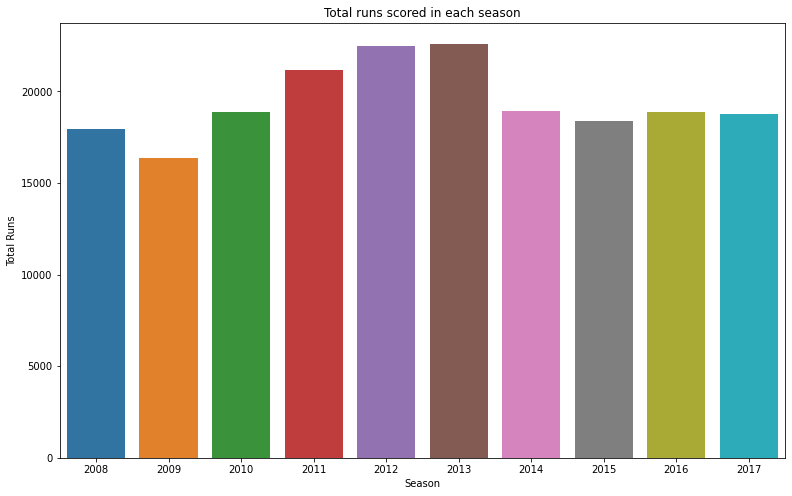

In [ ]:
#Barplot on total runs scored in a season
plt.figure(figsize=(13,8))
sns.barplot(x='season',y='total_runs',data=season_runs)
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Total runs scored in each season',fontsize=12)

In [ ]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

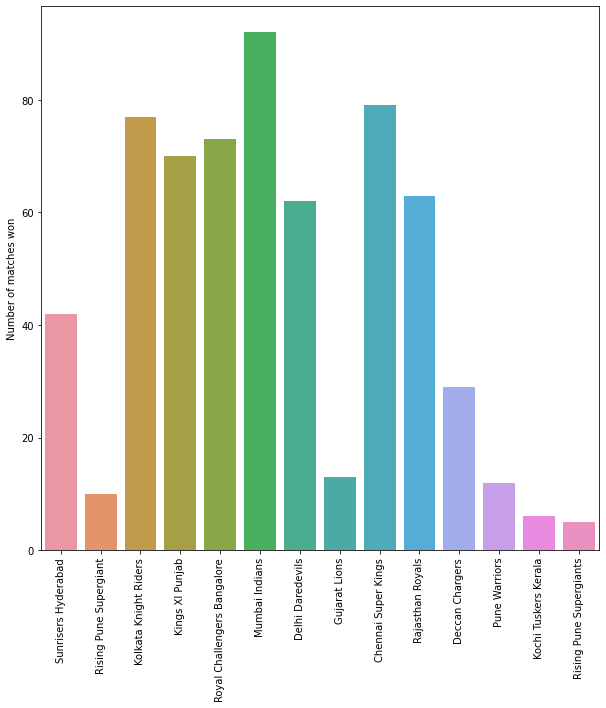

In [ ]:
#Total matches won by each team
plt.figure(figsize = (10,10))
sns.countplot('winner', data=df_matches)
plt.xlabel('')
plt.ylabel('Number of matches won')
plt.xticks(rotation = 90)



In [ ]:
df_matches.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

**As clear from the above data that top 3 teams to win most number of matches are "Mumbai Indians", "Chennai Super Kings" & "Kolkata Knight Riders", so we will filter the df_matches dataframe based on winners and pick top 5 players from each**

In [ ]:
#Filtering dataframe df_matches based on winners by "Mumbai Indians"
MI_df = df_matches.loc[(df_matches.winner == "Mumbai Indians")]

In [ ]:
MI_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
9,10,2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
11,12,2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary
15,16,2017,Mumbai,16-04-2017,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi
21,22,2017,Indore,20-04-2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin


In [ ]:
#Picking top 7 players from the filtered dataset
auction_players_1 = MI_df.player_of_match.value_counts().head(7)
auction_players_1 = pd.DataFrame(auction_players_1).reset_index()
auction_players_1.set_axis(['player_name', 'best_performer'], axis='columns', inplace=True)
auction_players_1 = auction_players_1.iloc[:,0]
auction_players_1

0          RG Sharma
1         KA Pollard
2       SR Tendulkar
3          AT Rayudu
4    Harbhajan Singh
5         SL Malinga
6          KH Pandya
Name: player_name, dtype: object

In [ ]:
#Filtering dataframe df_matches based on winners by "Chennai Super Kings"
CSK_df = df_matches.loc[(df_matches.winner == "Chennai Super Kings")]
CSK_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
60,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
66,67,2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
70,71,2008,Chennai,26-04-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash
73,74,2008,Bangalore,28-04-2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin
86,87,2008,Delhi,08-05-2008,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin


In [ ]:
#Picking top 7 players from the filtered dataset
auction_players_2 = CSK_df.player_of_match.value_counts().head(7)
auction_players_2 = pd.DataFrame(auction_players_2).reset_index()
auction_players_2.set_axis(['player_name', 'best_performer'], axis='columns', inplace=True)
auction_players_2 = auction_players_2.iloc[:,0]
auction_players_2

0      SK Raina
1      MS Dhoni
2    MEK Hussey
3     RA Jadeja
4       M Vijay
5     ML Hayden
6      DR Smith
Name: player_name, dtype: object

In [ ]:
#Filtering dataframe df_matches based on winners by "Kolkata Knight Riders"
KKR_df = df_matches.loc[(df_matches.winner == "Kolkata Knight Riders")]
KKR_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
10,11,2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong
13,14,2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
17,18,2017,Delhi,17-04-2017,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan
26,27,2017,Kolkata,23-04-2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan


In [ ]:
#Picking top 7 players from the filtered dataset
auction_players_3 = KKR_df.player_of_match.value_counts().head(7)
auction_players_3 = pd.DataFrame(auction_players_3).reset_index()
auction_players_3.set_axis(['player_name', 'best_performer'], axis='columns', inplace=True)
auction_players_3 = auction_players_3.iloc[:,0]
auction_players_3

0     G Gambhir
1     YK Pathan
2    RV Uthappa
3    AD Russell
4     JH Kallis
5     SP Narine
6    SC Ganguly
Name: player_name, dtype: object

Text(0.5, 1.0, 'BATSMAN WITH MOST RUNS')

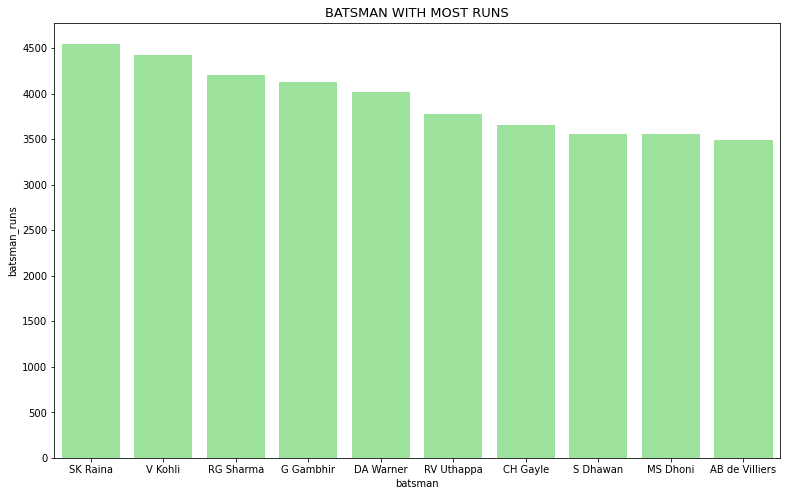

In [ ]:
#batsman with most runs
temp_df = df_deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
plt.figure(figsize=(13,8))
sns.barplot(x='batsman',y='batsman_runs',data=temp_df,color='lightgreen')
plt.yticks(np.arange(0,5000,500))
plt.title('BATSMAN WITH MOST RUNS',fontsize=13)

In [ ]:
#Picking up top 10 players from the list
auction_players_4 = temp_df.iloc[:,0]
auction_players_4

0          SK Raina
1           V Kohli
2         RG Sharma
3         G Gambhir
4         DA Warner
5        RV Uthappa
6          CH Gayle
7          S Dhawan
8          MS Dhoni
9    AB de Villiers
Name: batsman, dtype: object

Text(0.5, 1.0, 'Bowlers with most Wickets')

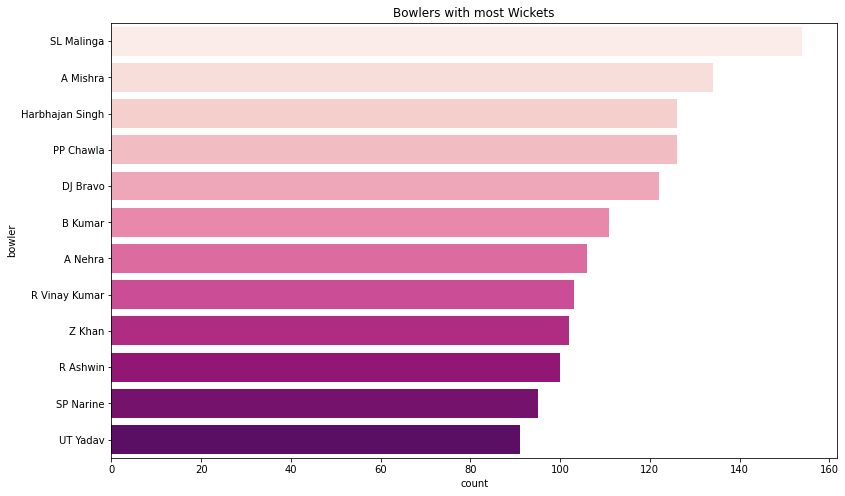

In [ ]:
#Bowlers with most number of wickets
top_bowlers = df_deliveries[df_deliveries["dismissal_kind"].isin(["bowled", "caught", "lbw", "stumped", "caught and bowled"])]
plt.figure(figsize=(13,8))
plot = sns.countplot(y='bowler',data=top_bowlers,order=top_bowlers['bowler'].value_counts().iloc[:12].index,palette='RdPu')
plot.set_title('Bowlers with most Wickets',fontsize=12)

In [ ]:
#Picking up top 12 bowlers based on number of wickets
top_12_bowlers = pd.DataFrame(top_bowlers['bowler'].value_counts().iloc[:12]).reset_index()
auction_players_5 = top_12_bowlers.iloc[:,0]
auction_players_5

0          SL Malinga
1            A Mishra
2     Harbhajan Singh
3           PP Chawla
4            DJ Bravo
5             B Kumar
6             A Nehra
7       R Vinay Kumar
8              Z Khan
9            R Ashwin
10          SP Narine
11           UT Yadav
Name: index, dtype: object

In [ ]:
#Most economical bowlers min 150 overs bowled
economy = df_deliveries.groupby(['bowler']).sum()
economy['total balls']=df_deliveries['bowler'].value_counts()
economy['overs_bowled']=(economy['total balls']//6)
economy['economy']=(economy['total_runs']/(economy['overs_bowled']))
economy[(economy['overs_bowled'] > 150)].sort_values(by = 'economy')[:10].economy.reset_index()
auction_players_6 = economy[(economy['overs_bowled'] > 150)].sort_values(by = 'economy')[:10].economy.reset_index().iloc[:,0]
auction_players_6

0          SP Narine
1           R Ashwin
2           DW Steyn
3           A Kumble
4     M Muralitharan
5         SL Malinga
6    Harbhajan Singh
7            B Kumar
8           S Nadeem
9           R Sharma
Name: bowler, dtype: object

**Finally we have made total 6 lists for most important players for picking up in auction, so now we will concatenate all these lists and remove duplicates and print our final Auction players list**

In [ ]:
final_auction_list = pd.concat([auction_players_1, auction_players_2, auction_players_3, auction_players_4, auction_players_5, auction_players_6], ignore_index=True)

In [ ]:
final_auction_list_df = pd.DataFrame(final_auction_list).reset_index()
final_auction_list_df.set_axis(['number', 'player_name'], axis='columns', inplace=True)
final_auction_list_df.drop(['number'],axis=1,inplace=True)
final_auction_list_df

,player_name
0,RG Sharma
1,KA Pollard
2,SR Tendulkar
3,AT Rayudu
4,Harbhajan Singh
5,SL Malinga
6,KH Pandya
7,SK Raina
8,MS Dhoni
9,MEK Hussey


In [ ]:
final_auction_list_df=pd.DataFrame((final_auction_list_df['player_name'].unique()))
final_auction_list_df

,0
0,RG Sharma
1,KA Pollard
2,SR Tendulkar
3,AT Rayudu
4,Harbhajan Singh
5,SL Malinga
6,KH Pandya
7,SK Raina
8,MS Dhoni
9,MEK Hussey


In [ ]:
final_auction_list_df.to_excel('C:\\Users\\LNT\\Desktop\\DATA ANALYTICS SELF LEARNING\\players_list.xlsx')